In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving train_data.txt to train_data.txt
Saving test_data_solution.txt to test_data_solution.txt
Saving test_data.txt to test_data.txt
Saving description.txt to description.txt


In [ ]:
import pandas as pd

def read_and_display_data(file_path, names):
    data = pd.read_csv(file_path, sep=':::', names=names)
    display(data.head())
    print(data.shape)
    return data

# Reading and displaying training data
train_data = read_and_display_data("train_data.txt", ['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

# Reading and displaying test data
test_data = read_and_display_data("test_data.txt", ['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

# Reading and displaying test solution data
test_solution_data = read_and_display_data("test_data_solution.txt", ['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


<ipython-input-7-7c840919c9bb>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(file_path, sep=':::', names=names)


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


(54214, 4)


<ipython-input-7-7c840919c9bb>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(file_path, sep=':::', names=names)


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


(54200, 4)


<ipython-input-7-7c840919c9bb>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(file_path, sep=':::', names=names)


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


(54200, 4)


DATA VISUALIZATION


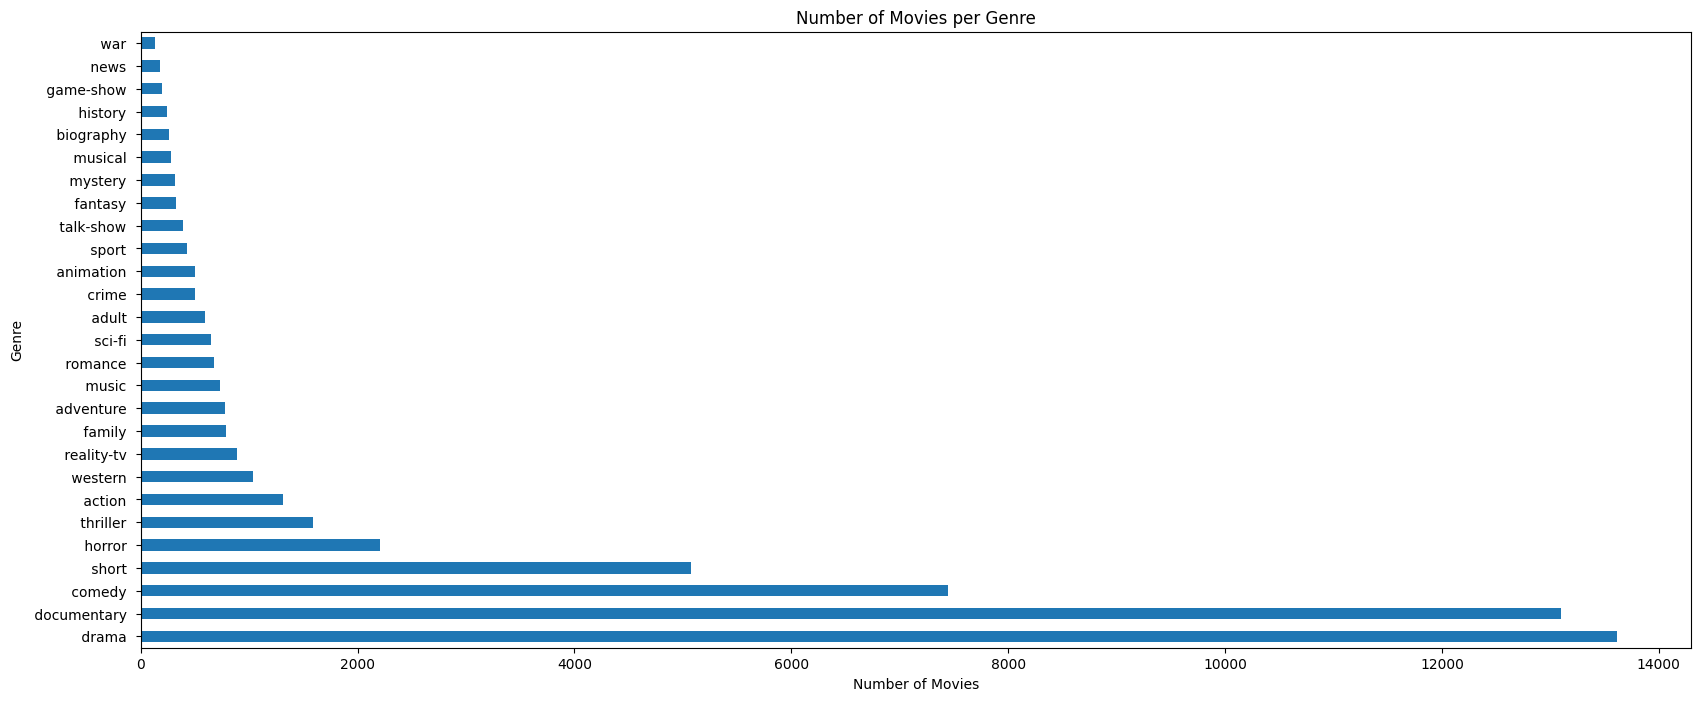

In [ ]:
# Counting occurrences of each genre
genre_counts = train_data['GENRE'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(20, 8))
genre_counts.plot(kind='barh')
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


Bar Representation  
Genre vs Description length

<ipython-input-12-860985ac8873>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='DESCRIPTION_length', y='GENRE', data=train_data, ci=None)


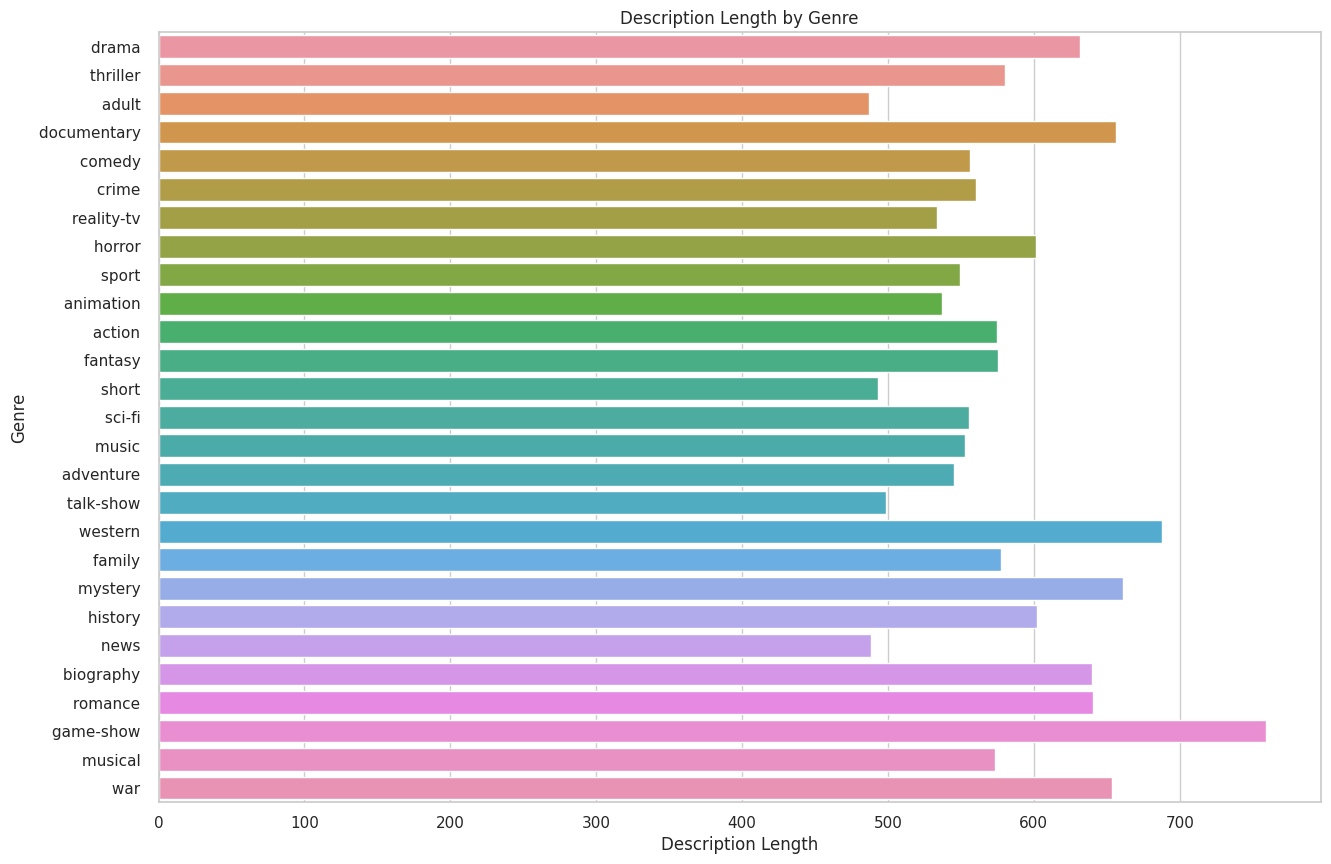

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate description length for each entry
train_data['DESCRIPTION_length'] = train_data['DESCRIPTION'].apply(len)

# Set the plotting style
sns.set(style="whitegrid")

# Plotting the bar chart
plt.figure(figsize=(15, 10))
sns.barplot(x='DESCRIPTION_length', y='GENRE', data=train_data, ci=None)
plt.title('Description Length by Genre')
plt.xlabel('Description Length')
plt.ylabel('Genre')
plt.show()


topmost genres

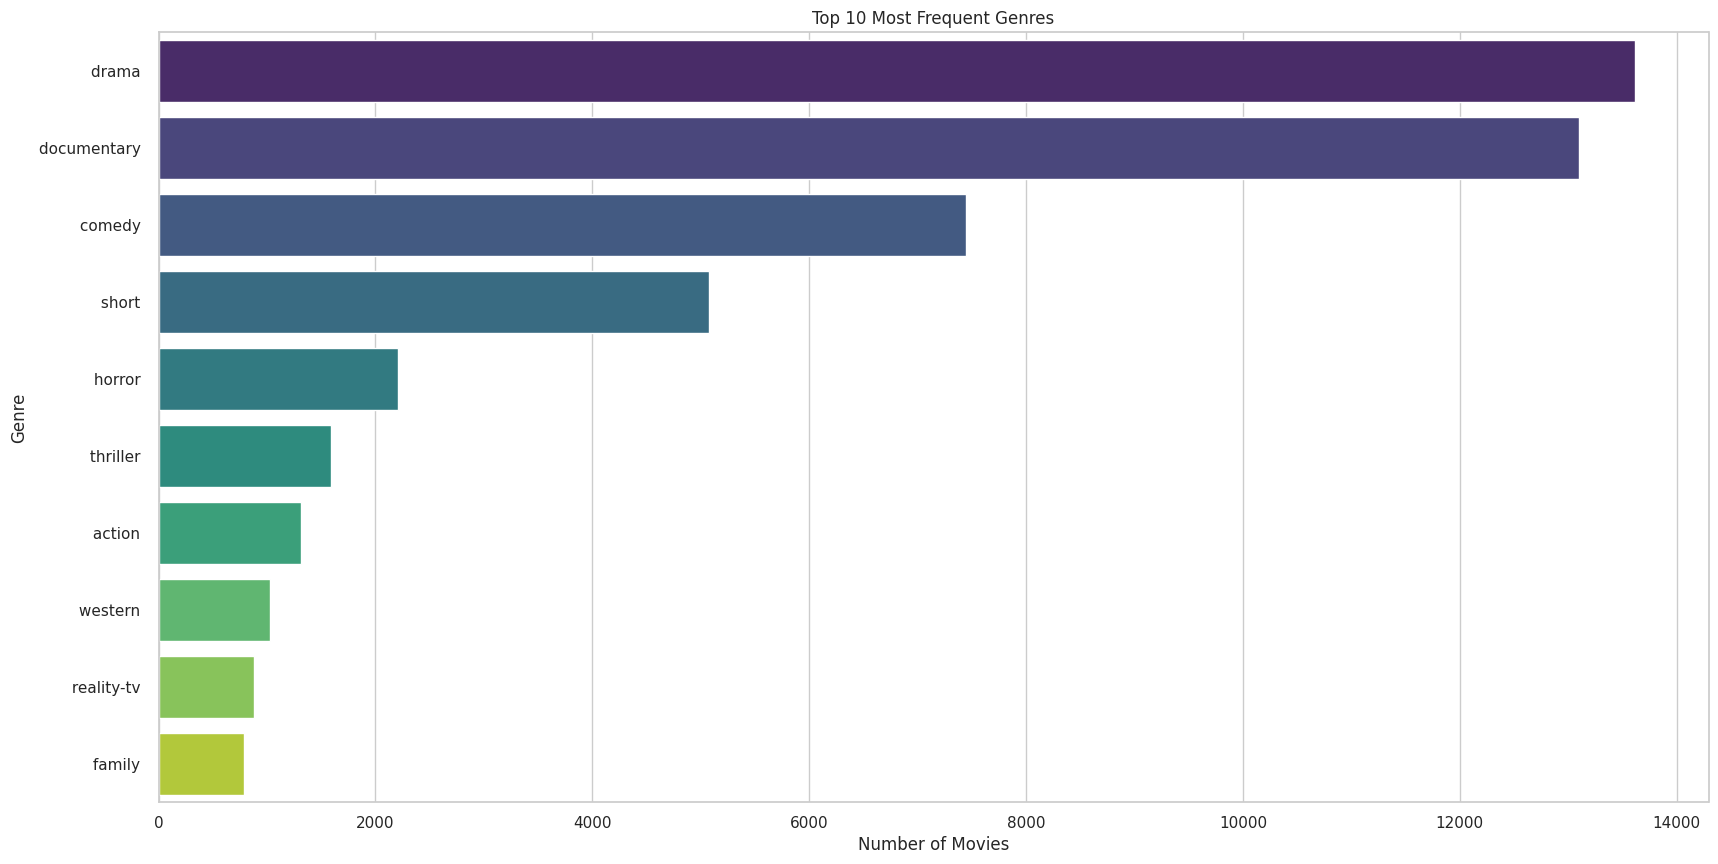

In [ ]:


# Calculate the top 10 genres
top_genres = train_data['GENRE'].value_counts().head(10)

# Set the plotting style
sns.set(style="whitegrid")

# Plotting the countplot
plt.figure(figsize=(20, 10))
sns.countplot(y='GENRE', data=train_data, order=top_genres.index, palette='viridis')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


train and test dataset

In [ ]:


# Handle potential missing values
train_data['DESCRIPTION'].fillna("", inplace=True)
test_data['DESCRIPTION'].fillna("", inplace=True)

# Vectorize the text data using TF-IDF
t_v = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = t_v.fit_transform(train_data['DESCRIPTION'])
X_test = t_v.transform(test_data['DESCRIPTION'])

# Encode the genre labels using LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_solution_data['GENRE'])


In [ ]:

# Split the data
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model
clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)

# Make predictions on the validation set
y_val_pred = clf.predict(X_val)

# Evaluate the model
validation_accuracy = accuracy_score(y_val, y_val_pred)
classification_report_val = classification_report(y_val, y_val_pred)

# Print the results
print("Validation Accuracy:", validation_accuracy)
print("Validation Classification Report:\n", classification_report_val)


Validation Accuracy: 0.5836945494789265
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.32      0.37       263
           1       0.74      0.44      0.55       112
           2       0.45      0.21      0.28       139
           3       0.47      0.15      0.23       104
           4       0.00      0.00      0.00        61
           5       0.53      0.59      0.56      1443
           6       0.39      0.07      0.11       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.72      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.13      0.03      0.04        74
          11       0.82      0.68      0.74        40
          12       0.00      0.00      0.00        45
          13       0.65      0.66      0.66       431
          14       0.61      0.53      0.57       144
          15       0.25      0.04      0.07        50
      

In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
classification_report_test = classification_report(y_test, y_pred)

# Print the results
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", classification_report_test)


Test Accuracy: 0.09357933579335793
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.00      0.00      0.00     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined
# Split the data (if not done previously)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Multinomial Naive Bayes classifier
mnb_classifier = MultinomialNB()
mnb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mnb_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
classification_report_test = classification_report(y_test, y_pred)

# Print the results
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", classification_report_test)


Test Accuracy: 0.2511439114391144
Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.25      1.00      0.40     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0.00      0.00      0.00       276
          16      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined
# Split the data (if not done previously)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multinomial Naive Bayes classifier
mnb_classifier = MultinomialNB()
mnb_classifier.fit(X_train, y_train)

# Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=500)
lr_classifier.fit(X_train, y_train)

# Predictions
y_pred_mnb = mnb_classifier.predict(X_test)
y_pred_lr = lr_classifier.predict(X_test)

# Evaluation for Multinomial Naive Bayes
test_accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
classification_report_mnb = classification_report(y_test, y_pred_mnb)

# Evaluation for Logistic Regression
test_accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_report_lr = classification_report(y_test, y_pred_lr)

# Print the results for Multinomial Naive Bayes
print("Multinomial Naive Bayes - Test Accuracy:", test_accuracy_mnb)
print("Multinomial Naive Bayes - Test Classification Report:\n", classification_report_mnb)

# Print the results for Logistic Regression
print("\nLogistic Regression - Test Accuracy:", test_accuracy_lr)
print("Logistic Regression - Test Classification Report:\n", classification_report_lr)


Multinomial Naive Bayes - Test Accuracy: 0.2511439114391144
Multinomial Naive Bayes - Test Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.00      0.00      0.00      7446
           6       0.00      0.00      0.00       505
           7       0.00      0.00      0.00     13096
           8       0.25      1.00      0.40     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00      0.00      0.00       731
          15       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
def predict_movie(description, model, vectorizer, label_encoder):
    description_vectorized = vectorizer.transform([description])
    pred_label = model.predict(description_vectorized)
    return label_encoder.inverse_transform(pred_label)[0]

# Assuming clf, t_v, and label_encoder are already defined
sample_descr_for_movie = "A movie girl falls in love with a boy"
print(predict_movie(sample_descr_for_movie, clf, t_v, label_encoder))

sample_descr_for_movie1 = "A movie where war is happening"
print(predict_movie(sample_descr_for_movie1, clf, t_v, label_encoder))


 drama 
 war 
